# Datasets

## Survey Dataset: 

In [ ]:
survey_data = read.csv("https://www.dropbox.com/s/4yd6qyo2vqt4j15/Survey.csv?dl=1")
head(survey_data) 

,SURVEY,CASE_ID,STATE,SQFT_BINNED,EDUC_BINNED,INCOME_BINNED,PN2,STANCE,INFLNC_PPLTALK,BUY_LEASE
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ADOPTER,1342,4,1,4,5,4,2,4,2
2,ADOPTER,1343,4,2,2,4,4,5,3,2
3,ADOPTER,1344,4,4,99,99,4,90,3,1
4,ADOPTER,1345,4,NA,2,3,1,5,2,99
5,ADOPTER,1346,4,4,2,1,3,3,2,2
6,ADOPTER,1347,4,2,3,95,5,3,4,1


In [ ]:
# Adding dummy variable for adoption for the models
survey_data <- cbind(survey_data, Has_Solar=0)
survey_data$Has_Solar <- ifelse(survey_data$SURVEY == "ADOPTER", 1,0)
head(survey_data)

,SURVEY,CASE_ID,STATE,SQFT_BINNED,EDUC_BINNED,INCOME_BINNED,PN2,STANCE,INFLNC_PPLTALK,BUY_LEASE,Has_Solar
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,ADOPTER,1342,4,1,4,5,4,2,4,2,1
2,ADOPTER,1343,4,2,2,4,4,5,3,2,1
3,ADOPTER,1344,4,4,99,99,4,90,3,1,1
4,ADOPTER,1345,4,NA,2,3,1,5,2,99,1
5,ADOPTER,1346,4,4,2,1,3,3,2,2,1
6,ADOPTER,1347,4,2,3,95,5,3,4,1,1


In [ ]:
lapply(survey_data[c('Has_Solar', 'SURVEY', 'STATE', 'BUY_LEASE', 'INFLNC_PPLTALK', 'STANCE', 'PN2', 'INCOME_BINNED', 'EDUC_BINNED', 'SQFT_BINNED')], unique)

$Has_Solar
[1] 1 0

$SURVEY
[1] "ADOPTER"    "CONSIDERER" "GPS"       

$STATE
[1] 4 2 1 3

$BUY_LEASE
[1]  2  1 99 NA

$INFLNC_PPLTALK
[1]  4  3  2  1 99  5 NA

$STANCE
[1]  2  5 90  3  1  4 97 99

$PN2
[1]  4  1  3  5  2 98 99 NA

$INCOME_BINNED
[1]  5  4 99  3  1 95  2 NA

$EDUC_BINNED
[1]  4  2 99  3 NA  1

$SQFT_BINNED
[1]  1  2  4 NA  3

#### Create 3 versions of survey dataset: 1 with missing values set to NA, 1 with missing values replaced with mode of column, 1 with missing values set to 99

In [ ]:
# Replace the unknown values with N/A
survey_data$BUY_LEASE <- ifelse(survey_data$BUY_LEASE == 99, NA, survey_data$BUY_LEASE)
survey_data$INFLNC_PPLTALK <- ifelse(survey_data$INFLNC_PPLTALK == 99, NA, survey_data$INFLNC_PPLTALK)
survey_data$STANCE <- ifelse(survey_data$STANCE >=90, NA, survey_data$STANCE)
survey_data$PN2 <- ifelse(survey_data$PN2 >= 98, NA, survey_data$PN2)
survey_data$INCOME_BINNED <- ifelse(survey_data$INCOME_BINNED >= 95, NA, survey_data$INCOME_BINNED)
survey_data$EDUC_BINNED <- ifelse(survey_data$EDUC_BINNED == 99, NA, survey_data$EDUC_BINNED) # This one is for when all the 99s are replaced with NA
survey_data$SQFT_BINNED <- ifelse(survey_data$SQFT_BINNED > 5, NA, survey_data$SQFT_BINNED)

lapply(survey_data[c('Has_Solar', 'SURVEY', 'STATE', 'BUY_LEASE', 'INFLNC_PPLTALK', 'STANCE', 'PN2', 'INCOME_BINNED', 'EDUC_BINNED', 'SQFT_BINNED')], unique)

$Has_Solar
[1] 1 0

$SURVEY
[1] "ADOPTER"    "CONSIDERER" "GPS"       

$STATE
[1] 4 2 1 3

$BUY_LEASE
[1]  2  1 NA

$INFLNC_PPLTALK
[1]  4  3  2  1 NA  5

$STANCE
[1]  2  5 NA  3  1  4

$PN2
[1]  4  1  3  5  2 NA

$INCOME_BINNED
[1]  5  4 NA  3  1  2

$EDUC_BINNED
[1]  4  2 NA  3  1

$SQFT_BINNED
[1]  1  2  4 NA  3

In [ ]:
# Create factors
survey_data$BUY_LEASE <- as.factor(survey_data$BUY_LEASE)
survey_data$INFLNC_PPLTALK <- as.factor(survey_data$INFLNC_PPLTALK)
survey_data$STANCE <- as.factor(survey_data$STANCE)
survey_data$PN2 <- as.factor(survey_data$PN2)
survey_data$INCOME_BINNED <- as.factor(survey_data$INCOME_BINNED)
survey_data$EDUC_BINNED <- as.factor(survey_data$EDUC_BINNED)
survey_data$SQFT_BINNED <- as.factor(survey_data$SQFT_BINNED)
survey_data$Has_Solar <- as.factor(survey_data$Has_Solar)
survey_data$STATE <- as.factor(survey_data$STATE)

In [ ]:
# Mode function
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

In [ ]:
survey_data_mode <- survey_data
survey_data_mode$BUY_LEASE <- ifelse(is.na(survey_data_mode$BUY_LEASE), Mode(survey_data$BUY_LEASE), survey_data$BUY_LEASE)
survey_data_mode$INFLNC_PPLTALK <- ifelse(is.na(survey_data_mode$INFLNC_PPLTALK),Mode(survey_data$INFLNC_PPLTALK), survey_data_mode$INFLNC_PPLTALK)
survey_data_mode$STANCE <- ifelse(is.na(survey_data_mode$STANCE), Mode(survey_data$STANCE), survey_data_mode$STANCE)
survey_data_mode$PN2 <- ifelse(is.na(survey_data_mode$PN2), Mode(survey_data$PN2), survey_data_mode$PN2)
survey_data_mode$INCOME_BINNED <- ifelse(is.na(survey_data_mode$INCOME_BINNED), Mode(survey_data$INCOME_BINNED), survey_data_mode$INCOME_BINNED)
survey_data_mode$EDUC_BINNED <- ifelse(is.na(survey_data_mode$EDUC_BINNED), Mode(survey_data$EDUC_BINNED), survey_data_mode$EDUC_BINNED) # This one is for when all of the NAs are replaced with 99
survey_data_mode$SQFT_BINNED <- ifelse(is.na(survey_data_mode$SQFT_BINNED), Mode(survey_data$SQFT_BINNED), survey_data_mode$SQFT_BINNED)

lapply(survey_data_mode[c('Has_Solar', 'SURVEY', 'STATE', 'BUY_LEASE', 'INFLNC_PPLTALK', 'STANCE', 'PN2', 'INCOME_BINNED', 'EDUC_BINNED', 'SQFT_BINNED')], unique)

# for INFLNC_PPLTALK & BUY_LEASE NA is the mode because those fields are only in the ADOPTER survey

$Has_Solar
[1] 1 0
Levels: 0 1

$SURVEY
[1] "ADOPTER"    "CONSIDERER" "GPS"       

$STATE
[1] 4 2 1 3
Levels: 1 2 3 4

$BUY_LEASE
[1]  2  1 NA

$INFLNC_PPLTALK
[1]  4  3  2  1 NA  5

$STANCE
[1] 2 5 3 1 4

$PN2
[1] 4 1 3 5 2

$INCOME_BINNED
[1] 5 4 3 1 2

$EDUC_BINNED
[1] 4 2 3 1

$SQFT_BINNED
[1] 1 2 4 3

In [ ]:
# Create factors
survey_data_mode$BUY_LEASE <- as.factor(survey_data_mode$BUY_LEASE)
survey_data_mode$INFLNC_PPLTALK <- as.factor(survey_data_mode$INFLNC_PPLTALK)
survey_data_mode$STANCE <- as.factor(survey_data_mode$STANCE)
survey_data_mode$PN2 <- as.factor(survey_data_mode$PN2)
survey_data_mode$INCOME_BINNED <- as.factor(survey_data_mode$INCOME_BINNED)
survey_data_mode$EDUC_BINNED <- as.factor(survey_data_mode$EDUC_BINNED)
survey_data_mode$SQFT_BINNED <- as.factor(survey_data_mode$SQFT_BINNED)
survey_data_mode$Has_Solar <- as.factor(survey_data_mode$Has_Solar)
survey_data_mode$STATE <- as.factor(survey_data_mode$STATE)

In [ ]:
survey_data_99 <- survey_data
survey_data_99$BUY_LEASE <- ifelse(is.na(survey_data_99$BUY_LEASE), 99, survey_data_99$BUY_LEASE)
survey_data_99$INFLNC_PPLTALK <- ifelse(is.na(survey_data_99$INFLNC_PPLTALK),99, survey_data_99$INFLNC_PPLTALK)
survey_data_99$STANCE <- ifelse(is.na(survey_data_99$STANCE), 99, survey_data_99$STANCE)
survey_data_99$PN2 <- ifelse(is.na(survey_data_99$PN2), 99, survey_data_99$PN2)
survey_data_99$INCOME_BINNED <- ifelse(is.na(survey_data_99$INCOME_BINNED), 99, survey_data_99$INCOME_BINNED)
survey_data_99$EDUC_BINNED <- ifelse(is.na(survey_data_99$EDUC_BINNED), 99, survey_data_99$EDUC_BINNED) # This one is for when all of the NAs are replaced with 99
survey_data_99$SQFT_BINNED <- ifelse(is.na(survey_data_99$SQFT_BINNED), 99, survey_data_99$SQFT_BINNED) #codebook didn't have a value for missing data

lapply(survey_data_99[c('Has_Solar', 'SURVEY', 'STATE', 'BUY_LEASE', 'INFLNC_PPLTALK', 'STANCE', 'PN2', 'INCOME_BINNED', 'EDUC_BINNED', 'SQFT_BINNED')], unique)

# for INFLNC_PPLTALK & BUY_LEASE NA is the mode because those fields are only in the ADOPTER survey

$Has_Solar
[1] 1 0
Levels: 0 1

$SURVEY
[1] "ADOPTER"    "CONSIDERER" "GPS"       

$STATE
[1] 4 2 1 3
Levels: 1 2 3 4

$BUY_LEASE
[1]  2  1 99

$INFLNC_PPLTALK
[1]  4  3  2  1 99  5

$STANCE
[1]  2  5 99  3  1  4

$PN2
[1]  4  1  3  5  2 99

$INCOME_BINNED
[1]  5  4 99  3  1  2

$EDUC_BINNED
[1]  4  2 99  3  1

$SQFT_BINNED
[1]  1  2  4 99  3

In [ ]:
# Create factors for survey_data_99
survey_data_99$BUY_LEASE <- as.factor(survey_data_99$BUY_LEASE)
survey_data_99$INFLNC_PPLTALK <- as.factor(survey_data_99$INFLNC_PPLTALK)
survey_data_99$STANCE <- as.factor(survey_data_99$STANCE)
survey_data_99$PN2 <- as.factor(survey_data_99$PN2)
survey_data_99$INCOME_BINNED <- as.factor(survey_data_99$INCOME_BINNED)
survey_data_99$EDUC_BINNED <- as.factor(survey_data_99$EDUC_BINNED)
survey_data_99$SQFT_BINNED <- as.factor(survey_data_99$SQFT_BINNED)
survey_data_99$Has_Solar <- as.factor(survey_data_99$Has_Solar)
survey_data_99$STATE <- as.factor(survey_data_99$STATE)

head(survey_data)
head(survey_data_99)
head(survey_data_mode)

,SURVEY,CASE_ID,STATE,SQFT_BINNED,EDUC_BINNED,INCOME_BINNED,PN2,STANCE,INFLNC_PPLTALK,BUY_LEASE,Has_Solar
,<chr>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,ADOPTER,1342,4,1,4,5,4,2,4,2,1
2,ADOPTER,1343,4,2,2,4,4,5,3,2,1
3,ADOPTER,1344,4,4,NA,NA,4,NA,3,1,1
4,ADOPTER,1345,4,NA,2,3,1,5,2,NA,1
5,ADOPTER,1346,4,4,2,1,3,3,2,2,1
6,ADOPTER,1347,4,2,3,NA,5,3,4,1,1


,SURVEY,CASE_ID,STATE,SQFT_BINNED,EDUC_BINNED,INCOME_BINNED,PN2,STANCE,INFLNC_PPLTALK,BUY_LEASE,Has_Solar
,<chr>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,ADOPTER,1342,4,1,4,5,4,2,4,2,1
2,ADOPTER,1343,4,2,2,4,4,5,3,2,1
3,ADOPTER,1344,4,4,99,99,4,99,3,1,1
4,ADOPTER,1345,4,99,2,3,1,5,2,99,1
5,ADOPTER,1346,4,4,2,1,3,3,2,2,1
6,ADOPTER,1347,4,2,3,99,5,3,4,1,1


,SURVEY,CASE_ID,STATE,SQFT_BINNED,EDUC_BINNED,INCOME_BINNED,PN2,STANCE,INFLNC_PPLTALK,BUY_LEASE,Has_Solar
,<chr>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,ADOPTER,1342,4,1,4,5,4,2,4,2,1
2,ADOPTER,1343,4,2,2,4,4,5,3,2,1
3,ADOPTER,1344,4,4,2,4,4,3,3,1,1
4,ADOPTER,1345,4,2,2,3,1,5,2,NA,1
5,ADOPTER,1346,4,4,2,1,3,3,2,2,1
6,ADOPTER,1347,4,2,3,4,5,3,4,1,1


## Net Generation of Solar Dataset: 

In [ ]:
generation_data = read.csv("https://www.dropbox.com/s/0m9u4iibkxu2b1r/Net%20Generation%20Cleaned%20CSV.csv?dl=1")
head(generation_data)
tail(generation_data)
str(generation_data)

# Change the format for month column and datatype to Date

generation_data$Month <- as.Date(paste0("01-", generation_data$Month), format = "%d-%b-%y")
new_names <- c("Month",paste0("Net_Gen_", names(generation_data)[-1]))
names(generation_data) <- new_names

head(generation_data)
str(generation_data)

,Month,New.York,New.Jersey,California,Arizona
,<chr>,<int>,<int>,<int>,<int>
1,Jan-14,7,16,126,34
2,Feb-14,8,18,131,33
3,Mar-14,11,24,191,43
4,Apr-14,13,25,210,46
5,May-14,15,28,236,50
6,Jun-14,16,28,242,48


,Month,New.York,New.Jersey,California,Arizona
,<chr>,<int>,<int>,<int>,<int>
103,Jul-22,163,153,1581,258
104,Aug-22,152,146,1520,253
105,Sep-22,128,124,1352,240
106,Oct-22,103,99,1290,244
107,Nov-22,77,82,1023,213
108,Dec-22,72,72,877,200


'data.frame':	108 obs. of  5 variables:
 $ Month     : chr  "Jan-14" "Feb-14" "Mar-14" "Apr-14" ...
 $ New.York  : int  7 8 11 13 15 16 18 17 17 15 ...
 $ New.Jersey: int  16 18 24 25 28 28 30 29 26 23 ...
 $ California: int  126 131 191 210 236 242 257 259 243 231 ...
 $ Arizona   : int  34 33 43 46 50 48 47 48 47 49 ...


,Month,Net_Gen_New.York,Net_Gen_New.Jersey,Net_Gen_California,Net_Gen_Arizona
,<date>,<int>,<int>,<int>,<int>
1,2014-01-01,7,16,126,34
2,2014-02-01,8,18,131,33
3,2014-03-01,11,24,191,43
4,2014-04-01,13,25,210,46
5,2014-05-01,15,28,236,50
6,2014-06-01,16,28,242,48


'data.frame':	108 obs. of  5 variables:
 $ Month             : Date, format: "2014-01-01" "2014-02-01" ...
 $ Net_Gen_New.York  : int  7 8 11 13 15 16 18 17 17 15 ...
 $ Net_Gen_New.Jersey: int  16 18 24 25 28 28 30 29 26 23 ...
 $ Net_Gen_California: int  126 131 191 210 236 242 257 259 243 231 ...
 $ Net_Gen_Arizona   : int  34 33 43 46 50 48 47 48 47 49 ...


## Average Retail Price Dataset: 

In [ ]:
price_data = read.csv("https://www.dropbox.com/s/n6k9qbuc0c5dkwy/Retail%20Price%20Cleaned%20CSV.csv?dl=1")
price_data = price_data[, -6] # Remove the United States column

head(price_data)
tail(price_data)
str(price_data)

# Change the format for month column and datatype to Date
price_data$Month <- as.Date(paste0("01-", price_data$Month), format = "%d-%b-%y")
price_data <- price_data[price_data$Month >= as.Date("2014-01-01"), ] 
new_names <- c("Month",paste0("Price_", names(price_data)[-1]))
names(price_data) <- new_names
# Convert cents per KiloWatthour to dollar per MegaWatthour
price_data[, 2:5] <- price_data[, 2:5] * 10       

head(price_data)
str(price_data)

,Month,New.York,New.Jersey,California,Arizona
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Jan-01,13.89,9.62,10.89,6.99
2,Feb-01,13.93,9.34,11.14,7.13
3,Mar-01,13.58,9.79,11.29,7.40
4,Apr-01,13.44,9.90,11.14,8.09
5,May-01,14.01,9.92,11.97,9.41
6,Jun-01,14.41,10.86,12.87,9.04


,Month,New.York,New.Jersey,California,Arizona
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
259,Jul-22,21.88,17.14,26.75,13.07
260,Aug-22,21.19,17.28,27.21,13.18
261,Sep-22,23.95,16.65,26.57,13.27
262,Oct-22,23.27,16.39,25.02,13.10
263,Nov-22,23.66,16.24,26.05,13.10
264,Dec-22,22.79,16.72,24.46,12.56


'data.frame':	264 obs. of  5 variables:
 $ Month     : chr  "Jan-01" "Feb-01" "Mar-01" "Apr-01" ...
 $ New.York  : num  13.9 13.9 13.6 13.4 14 ...
 $ New.Jersey: num  9.62 9.34 9.79 9.9 9.92 ...
 $ California: num  10.9 11.1 11.3 11.1 12 ...
 $ Arizona   : num  6.99 7.13 7.4 8.09 9.41 9.04 8.84 8.84 8.81 8.95 ...


,Month,Price_New.York,Price_New.Jersey,Price_California,Price_Arizona
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
157,2014-01-01,195.7,152.2,165.7,108.3
158,2014-02-01,216.9,156.3,161.1,111.3
159,2014-03-01,209.0,158.8,158.6,112.2
160,2014-04-01,195.4,156.9,101.2,118.8
161,2014-05-01,205.9,154.5,164.6,125.2
162,2014-06-01,208.8,158.7,169.0,123.6


'data.frame':	108 obs. of  5 variables:
 $ Month           : Date, format: "2014-01-01" "2014-02-01" ...
 $ Price_New.York  : num  196 217 209 195 206 ...
 $ Price_New.Jersey: num  152 156 159 157 154 ...
 $ Price_California: num  166 161 159 101 165 ...
 $ Price_Arizona   : num  108 111 112 119 125 ...


# Models & Analysis

## What factors affect solar adoption the most?  

In [ ]:
# Model for all missing/withheld data replaced with NA
Model_Adopt_NA <- glm(Has_Solar ~ SQFT_BINNED + EDUC_BINNED + INCOME_BINNED + PN2 + STANCE + STATE, data = survey_data, family = "binomial")
summary(Model_Adopt_NA)


Call:
glm(formula = Has_Solar ~ SQFT_BINNED + EDUC_BINNED + INCOME_BINNED + 
    PN2 + STANCE + STATE, family = "binomial", data = survey_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2983  -0.6741  -0.4194   0.8115   2.6873  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.63798    0.42168  -8.627  < 2e-16 ***
SQFT_BINNED2    0.63520    0.14575   4.358 1.31e-05 ***
SQFT_BINNED3    0.27998    0.16533   1.693 0.090363 .  
SQFT_BINNED4    0.13626    0.17140   0.795 0.426627    
EDUC_BINNED2    1.03837    0.20773   4.999 5.77e-07 ***
EDUC_BINNED3    1.16299    0.21217   5.481 4.22e-08 ***
EDUC_BINNED4    0.82045    0.22130   3.707 0.000209 ***
INCOME_BINNED2  0.13476    0.18716   0.720 0.471506    
INCOME_BINNED3  0.07004    0.19027   0.368 0.712795    
INCOME_BINNED4  0.51074    0.18151   2.814 0.004896 ** 
INCOME_BINNED5  0.79354    0.19964   3.975 7.04e-05 ***
PN22           -0.69604    0.28951  -2.404 0.016207 * 

In [ ]:
# Model for all missing/withheld data replaced with 99
Model_Adopt_99 <- glm(Has_Solar ~ SQFT_BINNED + EDUC_BINNED + INCOME_BINNED + PN2 + STANCE + STATE, data = survey_data_99, family = "binomial")
summary(Model_Adopt_99)


Call:
glm(formula = Has_Solar ~ SQFT_BINNED + EDUC_BINNED + INCOME_BINNED + 
    PN2 + STANCE + STATE, family = "binomial", data = survey_data_99)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8209  -0.6941  -0.3778   0.8204   2.6397  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -3.6821     0.3426 -10.748  < 2e-16 ***
SQFT_BINNED2      0.5166     0.1207   4.279 1.88e-05 ***
SQFT_BINNED3      0.3035     0.1356   2.239 0.025161 *  
SQFT_BINNED4      0.1711     0.1391   1.230 0.218595    
SQFT_BINNED99     2.2935     0.2050  11.185  < 2e-16 ***
EDUC_BINNED2      0.9084     0.1518   5.984 2.18e-09 ***
EDUC_BINNED3      0.9062     0.1580   5.734 9.80e-09 ***
EDUC_BINNED4      0.7324     0.1635   4.480 7.47e-06 ***
EDUC_BINNED99    18.3034   259.4505   0.071 0.943758    
INCOME_BINNED2    0.3426     0.1633   2.098 0.035872 *  
INCOME_BINNED3    0.1423     0.1662   0.856 0.391729    
INCOME_BINNED4    0.6274     0.1591   3

In [ ]:
# Model for all missing/withheld data replaced with the mode of that category
Model_Adopt_Mode <- glm(Has_Solar ~ SQFT_BINNED + EDUC_BINNED + INCOME_BINNED + PN2 + STANCE + STATE, data = survey_data_mode, family = "binomial")
summary(Model_Adopt_Mode)


Call:
glm(formula = Has_Solar ~ SQFT_BINNED + EDUC_BINNED + INCOME_BINNED + 
    PN2 + STANCE + STATE, family = "binomial", data = survey_data_mode)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3780  -0.7818  -0.4134   0.8341   2.5806  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.49801    0.32660 -10.710  < 2e-16 ***
SQFT_BINNED2    0.77730    0.11121   6.989 2.76e-12 ***
SQFT_BINNED3    0.28837    0.12899   2.236 0.025373 *  
SQFT_BINNED4    0.16839    0.13224   1.273 0.202901    
EDUC_BINNED2    1.08846    0.14421   7.548 4.42e-14 ***
EDUC_BINNED3    0.76844    0.15204   5.054 4.32e-07 ***
EDUC_BINNED4    0.62942    0.15734   4.000 6.32e-05 ***
INCOME_BINNED2  0.26739    0.15720   1.701 0.088960 .  
INCOME_BINNED3  0.15274    0.15883   0.962 0.336209    
INCOME_BINNED4  0.93709    0.14024   6.682 2.36e-11 ***
INCOME_BINNED5  0.92033    0.16544   5.563 2.65e-08 ***
PN22           -0.49400    0.22076  -2.238 0.0252

## What role does social influence play in solar adoption?

---




Call:
glm(formula = Has_Solar ~ INFLNC_PPLTALK, family = "binomial", 
    data = survey_data_talking)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8111  -1.2254   0.7204   0.8335   1.1302  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)       1.2164     0.1800   6.757 1.41e-11 ***
INFLNC_PPLTALK2   0.2080     0.2108   0.987   0.3239    
INFLNC_PPLTALK3  -0.2447     0.2003  -1.222   0.2218    
INFLNC_PPLTALK4  -0.3377     0.1982  -1.704   0.0884 .  
INFLNC_PPLTALK5  -1.1043     0.2540  -4.348 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2543.0  on 2184  degrees of freedom
Residual deviance: 2499.6  on 2180  degrees of freedom
AIC: 2509.6

Number of Fisher Scoring iterations: 4


label,value,count
<int>,<chr>,<dbl>
1,strongly disagree,135
2,disagree,428
3,neutral,473
4,agree,496
5,strongly agree,66


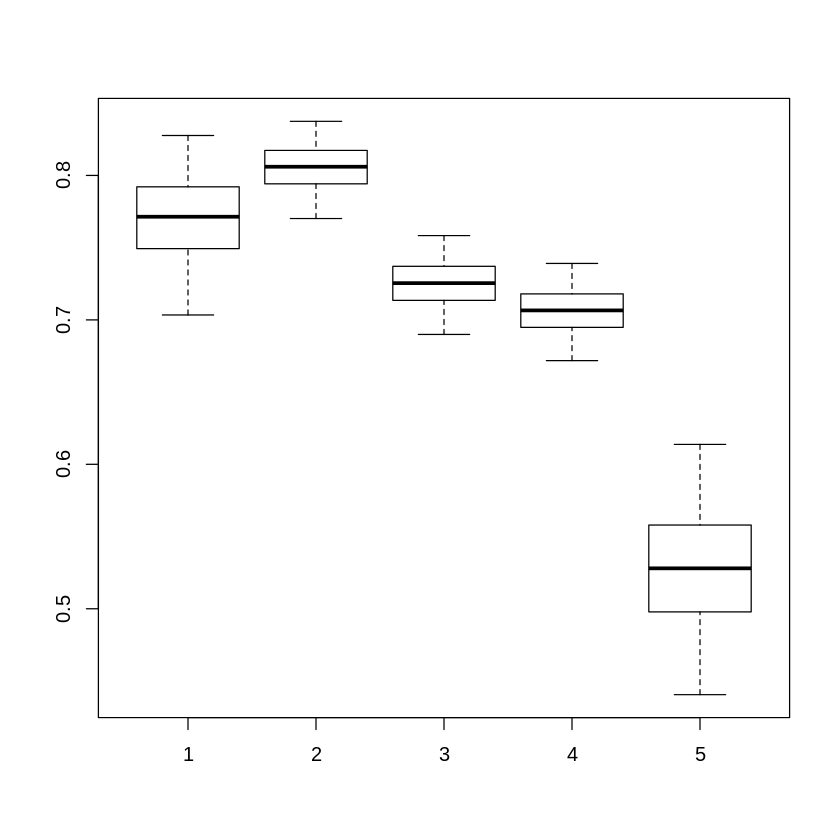

In [ ]:

survey_data_talking <- survey_data[survey_data$INFLNC_PPLTALK %in% c(1,2,3,4,5),]
survey_data_talking$INFLNC_PPLTALK <- as.factor(survey_data_talking$INFLNC_PPLTALK)

simple_talking_model <- glm(Has_Solar ~ INFLNC_PPLTALK, data = survey_data_talking, family = 'binomial')
summary(simple_talking_model)

data.frame(label = 1:5,
           value = c('strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree'),
           count = c(135, 428, 473, 496, 66))               

#Graphing
predict_frame <- data.frame(INFLNC_PPLTALK=unique(survey_data_talking$INFLNC_PPLTALK))
pp <- predict(simple_talking_model,newdata=predict_frame,se.fit=TRUE)
linkinv <- family(simple_talking_model)$linkinv ## inverse-link function

predict_frame$pred0 <- pp$fit
predict_frame$pred <- linkinv(pp$fit)
alpha <- 0.95
sc <- abs(qnorm((1-alpha)/2))  ## Normal approx. to likelihood
alpha2 <- 0.5
sc2 <- abs(qnorm((1-alpha2)/2))  ## Normal approx. to likelihood
predict_frame <- transform(predict_frame,
                    lwr=linkinv(pred0-sc*pp$se.fit),
                    upr=linkinv(pred0+sc*pp$se.fit),
                    lwr2=linkinv(pred0-sc2*pp$se.fit),
                    upr2=linkinv(pred0+sc2*pp$se.fit))

predict_frame <- predict_frame[order(predict_frame$INFLNC_PPLTALK),]

with(predict_frame,
{
    bxp(list(stats=rbind(lwr,lwr2,pred,upr2,upr),
             n = rep(1,nrow(predict_frame)),
             conf = NA,
             out = NULL,
             group = NULL,
             names=as.character(INFLNC_PPLTALK)))
})

## Is there a difference in factors for leasers vs. buyers?

In [ ]:
# Removing GPS rows where BUY_LEASE is not a factor
survey_data_lease = survey_data[survey_data$BUY_LEASE %in% c(1, 2),]
survey_data_lease$BUY_LEASE <- ifelse(survey_data_lease$BUY_LEASE == 2, 1,0) # BUY_LEASE = 1 if leased, 0 if bought

In [ ]:
# Create factors
survey_data_lease$BUY_LEASE <- as.factor(survey_data_lease$BUY_LEASE)
survey_data_lease$INFLNC_PPLTALK <- as.factor(survey_data_lease$INFLNC_PPLTALK)
survey_data_lease$STANCE <- as.factor(survey_data_lease$STANCE)
survey_data_lease$PN2 <- as.factor(survey_data_lease$PN2)
survey_data_lease$INCOME_BINNED <- as.factor(survey_data_lease$INCOME_BINNED)
survey_data_lease$EDUC_BINNED <- as.factor(survey_data_lease$EDUC_BINNED)
survey_data_lease$SQFT_BINNED <- as.factor(survey_data_lease$SQFT_BINNED)
survey_data_lease$Has_Solar <- as.factor(survey_data_lease$Has_Solar)
survey_data_lease$STATE <- as.factor(survey_data_lease$STATE)

In [ ]:
Model_Lease = glm(BUY_LEASE ~ SQFT_BINNED + EDUC_BINNED + INCOME_BINNED + PN2 + STANCE+ STATE, data = survey_data_lease, family = "binomial")
summary(Model_Lease)

toselect.x <- summary(Model_Lease)$coeff[-1,4] < 0.05 

relevant.x <- names(toselect.x)[toselect.x == TRUE] 

data.frame(summary(Model_Lease)$coeff)[relevant.x,]


Call:
glm(formula = BUY_LEASE ~ SQFT_BINNED + EDUC_BINNED + INCOME_BINNED + 
    PN2 + STANCE + STATE, family = "binomial", data = survey_data_lease)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.468  -1.034   0.609   0.809   1.552  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     4.11613    1.01583   4.052 5.08e-05 ***
SQFT_BINNED2   -0.39966    0.27841  -1.435 0.151147    
SQFT_BINNED3   -0.53073    0.30755  -1.726 0.084406 .  
SQFT_BINNED4   -0.94206    0.31104  -3.029 0.002456 ** 
EDUC_BINNED2   -1.39541    0.63511  -2.197 0.028013 *  
EDUC_BINNED3   -1.22933    0.63637  -1.932 0.053387 .  
EDUC_BINNED4   -1.86520    0.63986  -2.915 0.003557 ** 
INCOME_BINNED2 -0.13624    0.34413  -0.396 0.692183    
INCOME_BINNED3  0.22970    0.36655   0.627 0.530892    
INCOME_BINNED4 -0.07996    0.33188  -0.241 0.809615    
INCOME_BINNED5 -0.56256    0.34648  -1.624 0.104457    
PN22            0.27666    0.52273   0.529 0.596625    
PN

,Estimate,Std..Error,z.value,Pr...z..
,<dbl>,<dbl>,<dbl>,<dbl>
SQFT_BINNED4,-0.9420611,0.3110379,-3.028766,0.0024555462
EDUC_BINNED2,-1.3954079,0.6351109,-2.197109,0.0280126497
EDUC_BINNED4,-1.8652015,0.6398630,-2.915002,0.0035568681
STATE3,-2.3474227,0.6197580,-3.787644,0.0001520824
STATE4,-1.5616274,0.5586831,-2.795194,0.0051868601


## Is electricity cost a factor in solar energy generation?

In [ ]:
# First merge the NetGeneration Solar dataset with the Retail Price dataset before building the linear regression model: 

Gen_Price_Data <- merge(generation_data, price_data, by = "Month")

head(Gen_Price_Data)
tail(Gen_Price_Data)

Model_Generation_Price_NY=lm(formula=Net_Gen_New.York~Price_New.York,data = Gen_Price_Data )
Model_Generation_Price_NJ=lm(formula=Net_Gen_New.Jersey~Price_New.Jersey,data = Gen_Price_Data )
Model_Generation_Price_CA=lm(formula=Net_Gen_California~Price_California,data = Gen_Price_Data )
Model_Generation_Price_AZ=lm(formula=Net_Gen_Arizona~Price_Arizona,data = Gen_Price_Data )

print("Linear Regression Model for New York")
summary(Model_Generation_Price_NY)
print("Linear Regression Model for New Jersey")
summary(Model_Generation_Price_NJ)
print("Linear Regression Model for California")
summary(Model_Generation_Price_CA)
print("Linear Regression Model for Arizona")
summary(Model_Generation_Price_AZ)

,Month,Net_Gen_New.York,Net_Gen_New.Jersey,Net_Gen_California,Net_Gen_Arizona,Price_New.York,Price_New.Jersey,Price_California,Price_Arizona
,<date>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2014-01-01,7,16,126,34,195.7,152.2,165.7,108.3
2,2014-02-01,8,18,131,33,216.9,156.3,161.1,111.3
3,2014-03-01,11,24,191,43,209.0,158.8,158.6,112.2
4,2014-04-01,13,25,210,46,195.4,156.9,101.2,118.8
5,2014-05-01,15,28,236,50,205.9,154.5,164.6,125.2
6,2014-06-01,16,28,242,48,208.8,158.7,169.0,123.6


,Month,Net_Gen_New.York,Net_Gen_New.Jersey,Net_Gen_California,Net_Gen_Arizona,Price_New.York,Price_New.Jersey,Price_California,Price_Arizona
,<date>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
103,2022-07-01,163,153,1581,258,218.8,171.4,267.5,130.7
104,2022-08-01,152,146,1520,253,211.9,172.8,272.1,131.8
105,2022-09-01,128,124,1352,240,239.5,166.5,265.7,132.7
106,2022-10-01,103,99,1290,244,232.7,163.9,250.2,131.0
107,2022-11-01,77,82,1023,213,236.6,162.4,260.5,131.0
108,2022-12-01,72,72,877,200,227.9,167.2,244.6,125.6


[1] "Linear Regression Model for New York"



Call:
lm(formula = Net_Gen_New.York ~ Price_New.York, data = Gen_Price_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.101 -26.646  -2.249  28.781  71.449 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -75.5207    46.3289   -1.63  0.10605   
Price_New.York   0.7636     0.2439    3.13  0.00226 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.9 on 106 degrees of freedom
Multiple R-squared:  0.08462,	Adjusted R-squared:  0.07598 
F-statistic: 9.799 on 1 and 106 DF,  p-value: 0.002257


[1] "Linear Regression Model for New Jersey"



Call:
lm(formula = Net_Gen_New.Jersey ~ Price_New.Jersey, data = Gen_Price_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.665 -23.164  -0.164  20.640  70.287 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -629.1753    86.8270  -7.246 7.22e-11 ***
Price_New.Jersey    4.3903     0.5463   8.036 1.39e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.73 on 106 degrees of freedom
Multiple R-squared:  0.3786,	Adjusted R-squared:  0.3727 
F-statistic: 64.58 on 1 and 106 DF,  p-value: 1.388e-12


[1] "Linear Regression Model for California"



Call:
lm(formula = Net_Gen_California ~ Price_California, data = Gen_Price_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-330.44 -194.50  -32.41  165.46  524.39 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1002.538    128.922  -7.776 5.15e-12 ***
Price_California     8.609      0.651  13.224  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 227.9 on 106 degrees of freedom
Multiple R-squared:  0.6226,	Adjusted R-squared:  0.619 
F-statistic: 174.9 on 1 and 106 DF,  p-value: < 2.2e-16


[1] "Linear Regression Model for Arizona"



Call:
lm(formula = Net_Gen_Arizona ~ Price_Arizona, data = Gen_Price_Data)

Residuals:
   Min     1Q Median     3Q    Max 
-94.03 -36.79  -3.07  44.42  98.40 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -688.7695    97.7067  -7.049 1.90e-10 ***
Price_Arizona    6.6518     0.7924   8.394 2.24e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.27 on 106 degrees of freedom
Multiple R-squared:  0.3993,	Adjusted R-squared:  0.3936 
F-statistic: 70.46 on 1 and 106 DF,  p-value: 2.242e-13


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


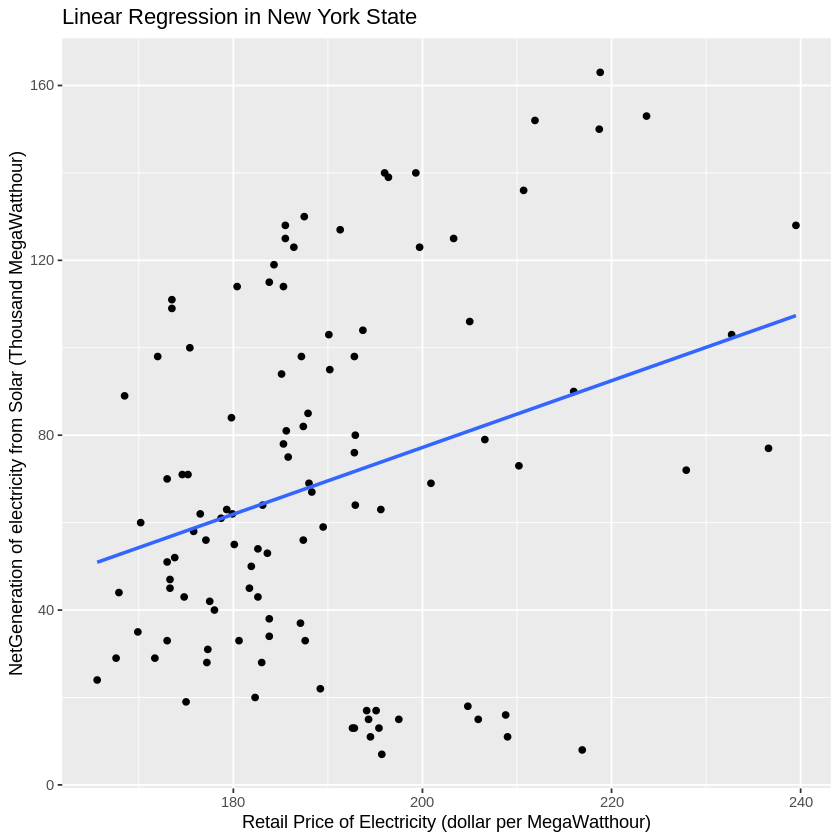

`geom_smooth()` using formula = 'y ~ x'


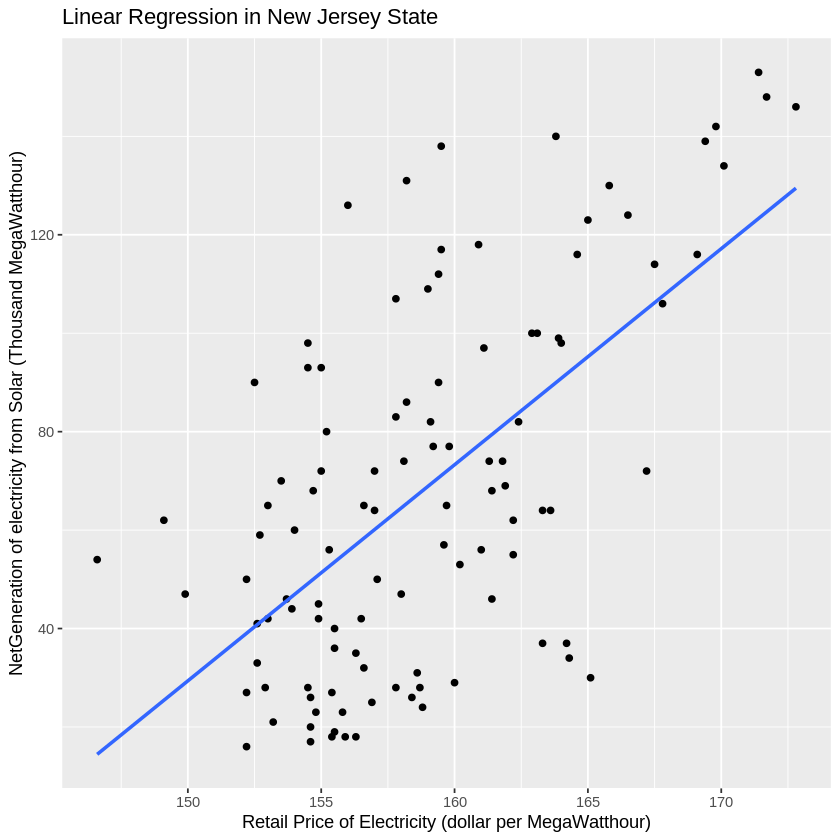

`geom_smooth()` using formula = 'y ~ x'


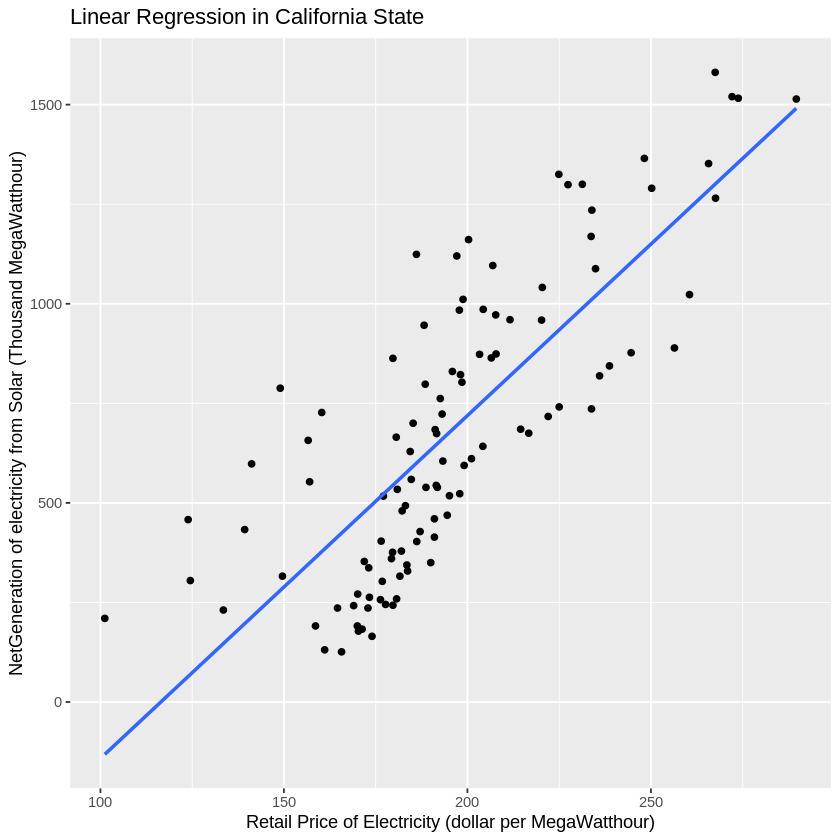

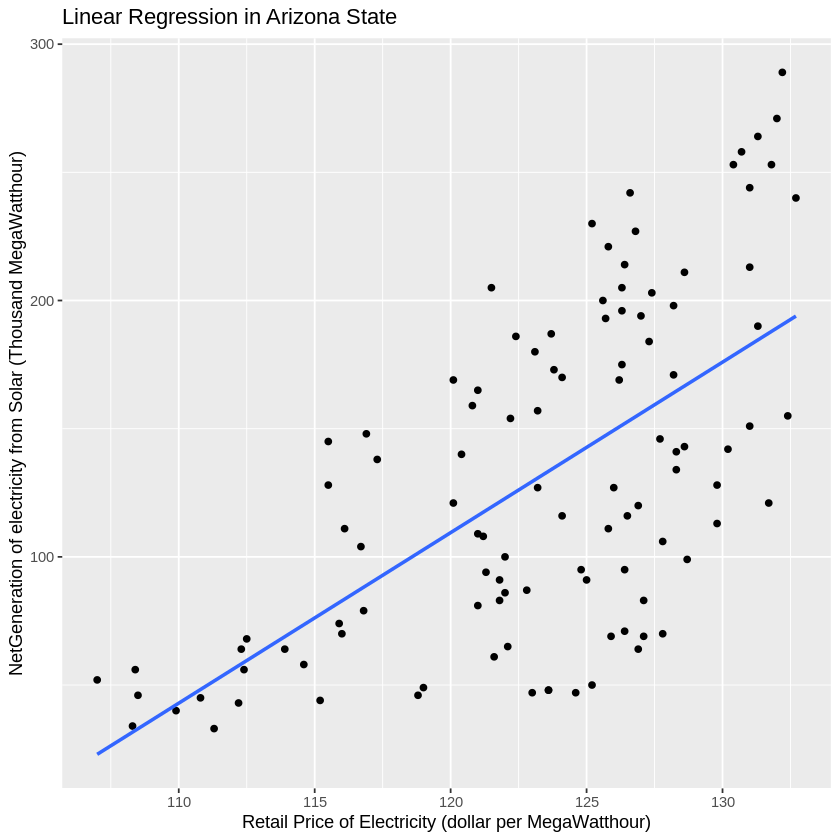

In [ ]:
library(ggplot2)

ggplot(Gen_Price_Data, aes(x = Price_New.York, y = Net_Gen_New.York)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)+
  ggtitle("Linear Regression in New York State")+
  xlab("Retail Price of Electricity (dollar per MegaWatthour)")+
  ylab("NetGeneration of electricity from Solar (Thousand MegaWatthour)")


ggplot(Gen_Price_Data, aes(x = Price_New.Jersey, y = Net_Gen_New.Jersey)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)+
  ggtitle("Linear Regression in New Jersey State")+
  xlab("Retail Price of Electricity (dollar per MegaWatthour)")+
  ylab("NetGeneration of electricity from Solar (Thousand MegaWatthour)")

ggplot(Gen_Price_Data, aes(x = Price_California, y = Net_Gen_California)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)+
  ggtitle("Linear Regression in California State")+
  xlab("Retail Price of Electricity (dollar per MegaWatthour)")+
  ylab("NetGeneration of electricity from Solar (Thousand MegaWatthour)")


ggplot(Gen_Price_Data, aes(x = Price_Arizona, y = Net_Gen_Arizona)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)+
  ggtitle("Linear Regression in Arizona State")+
  xlab("Retail Price of Electricity (dollar per MegaWatthour)")+
  ylab("NetGeneration of electricity from Solar (Thousand MegaWatthour)")

In [ ]:
# Create dummy variables for months
Gen_Price_Data$monthonly <- format(Gen_Price_Data$Month, "%m")
dummy_vars <- model.matrix(~ monthonly, data = Gen_Price_Data)

Gen_Price_Data_dummies <- cbind(Gen_Price_Data, dummy_vars)

head(Gen_Price_Data_dummies)

Model_without_Seasonality_NY <-lm(formula=Net_Gen_New.York~Price_New.York+monthonly02+monthonly03+monthonly04+monthonly05+monthonly06+monthonly07+monthonly08+monthonly09+monthonly10+monthonly11+monthonly12,data = Gen_Price_Data_dummies) 
summary(Model_without_Seasonality_NY)

Model_without_Seasonality_NJ <-lm(formula=Net_Gen_New.Jersey~Price_New.Jersey+monthonly02+monthonly03+monthonly04+monthonly05+monthonly06+monthonly07+monthonly08+monthonly09+monthonly10+monthonly11+monthonly12,data = Gen_Price_Data_dummies) 
summary(Model_without_Seasonality_NJ)

Model_without_Seasonality_CA <-lm(formula=Net_Gen_California~Price_California+monthonly02+monthonly03+monthonly04+monthonly05+monthonly06+monthonly07+monthonly08+monthonly09+monthonly10+monthonly11+monthonly12,data = Gen_Price_Data_dummies) 
summary(Model_without_Seasonality_CA)

Model_without_Seasonality_AZ <-lm(formula=Net_Gen_Arizona~Price_Arizona+monthonly02+monthonly03+monthonly04+monthonly05+monthonly06+monthonly07+monthonly08+monthonly09+monthonly10+monthonly11+monthonly12,data = Gen_Price_Data_dummies) 
summary(Model_without_Seasonality_AZ)

,Month,Net_Gen_New.York,Net_Gen_New.Jersey,Net_Gen_California,Net_Gen_Arizona,Price_New.York,Price_New.Jersey,Price_California,Price_Arizona,monthonly,⋯,monthonly03,monthonly04,monthonly05,monthonly06,monthonly07,monthonly08,monthonly09,monthonly10,monthonly11,monthonly12
,<date>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2014-01-01,7,16,126,34,195.7,152.2,165.7,108.3,01,⋯,0,0,0,0,0,0,0,0,0,0
2,2014-02-01,8,18,131,33,216.9,156.3,161.1,111.3,02,⋯,0,0,0,0,0,0,0,0,0,0
3,2014-03-01,11,24,191,43,209.0,158.8,158.6,112.2,03,⋯,1,0,0,0,0,0,0,0,0,0
4,2014-04-01,13,25,210,46,195.4,156.9,101.2,118.8,04,⋯,0,1,0,0,0,0,0,0,0,0
5,2014-05-01,15,28,236,50,205.9,154.5,164.6,125.2,05,⋯,0,0,1,0,0,0,0,0,0,0
6,2014-06-01,16,28,242,48,208.8,158.7,169.0,123.6,06,⋯,0,0,0,1,0,0,0,0,0,0



Call:
lm(formula = Net_Gen_New.York ~ Price_New.York + monthonly02 + 
    monthonly03 + monthonly04 + monthonly05 + monthonly06 + monthonly07 + 
    monthonly08 + monthonly09 + monthonly10 + monthonly11 + monthonly12, 
    data = Gen_Price_Data_dummies)

Residuals:
   Min     1Q Median     3Q    Max 
-85.29 -19.44   5.60  24.30  50.36 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -81.5794    45.0153  -1.812  0.07311 . 
Price_New.York   0.6675     0.2372   2.814  0.00595 **
monthonly02      4.2621    16.9163   0.252  0.80162   
monthonly03     30.7048    16.8726   1.820  0.07194 . 
monthonly04     39.2891    16.8702   2.329  0.02198 * 
monthonly05     44.1198    16.9550   2.602  0.01075 * 
monthonly06     43.2196    17.0952   2.528  0.01311 * 
monthonly07     48.1613    17.0557   2.824  0.00578 **
monthonly08     43.5417    16.9639   2.567  0.01183 * 
monthonly09     26.7369    17.1515   1.559  0.12235   
monthonly10     11.5079    17.1242   0.67


Call:
lm(formula = Net_Gen_New.Jersey ~ Price_New.Jersey + monthonly02 + 
    monthonly03 + monthonly04 + monthonly05 + monthonly06 + monthonly07 + 
    monthonly08 + monthonly09 + monthonly10 + monthonly11 + monthonly12, 
    data = Gen_Price_Data_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.946 -17.641   3.632  19.800  54.026 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -555.2988    96.4925  -5.755 1.06e-07 ***
Price_New.Jersey    3.8052     0.6127   6.210 1.39e-08 ***
monthonly02         2.8940    13.7859   0.210   0.8342    
monthonly03        22.4899    13.8188   1.627   0.1069    
monthonly04        24.9513    13.9241   1.792   0.0763 .  
monthonly05        33.6641    13.8950   2.423   0.0173 *  
monthonly06        32.6967    14.0394   2.329   0.0220 *  
monthonly07        26.0087    14.3999   1.806   0.0741 .  
monthonly08        23.8542    14.1609   1.685   0.0954 .  
monthonly09        22.8990    13.8414   1.


Call:
lm(formula = Net_Gen_California ~ Price_California + monthonly02 + 
    monthonly03 + monthonly04 + monthonly05 + monthonly06 + monthonly07 + 
    monthonly08 + monthonly09 + monthonly10 + monthonly11 + monthonly12, 
    data = Gen_Price_Data_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-368.15  -83.56   -6.12   86.59  387.66 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1409.1777   102.0576 -13.808  < 2e-16 ***
Price_California     9.5968     0.4623  20.760  < 2e-16 ***
monthonly02        -22.6939    71.7277  -0.316 0.752401    
monthonly03        190.7032    71.6885   2.660 0.009169 ** 
monthonly04        533.9133    72.4488   7.370 6.26e-11 ***
monthonly05        359.5500    71.6803   5.016 2.45e-06 ***
monthonly06        288.4618    71.8888   4.013 0.000120 ***
monthonly07        342.4045    71.8020   4.769 6.68e-06 ***
monthonly08        266.2628    71.9564   3.700 0.000361 ***
monthonly09        175.8533    7


Call:
lm(formula = Net_Gen_Arizona ~ Price_Arizona + monthonly02 + 
    monthonly03 + monthonly04 + monthonly05 + monthonly06 + monthonly07 + 
    monthonly08 + monthonly09 + monthonly10 + monthonly11 + monthonly12, 
    data = Gen_Price_Data_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.839 -38.452  -4.339  38.980 102.690 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -977.949    132.954  -7.356 6.69e-11 ***
Price_Arizona    9.306      1.143   8.141 1.52e-12 ***
monthonly02    -20.923     24.219  -0.864   0.3898    
monthonly03     -3.121     24.431  -0.128   0.8986    
monthonly04    -43.110     26.628  -1.619   0.1088    
monthonly05    -66.001     28.904  -2.283   0.0246 *  
monthonly06    -51.010     27.551  -1.852   0.0672 .  
monthonly07    -58.222     27.470  -2.119   0.0367 *  
monthonly08    -50.104     26.875  -1.864   0.0654 .  
monthonly09    -68.203     27.396  -2.490   0.0145 *  
monthonly10    -59.332     26.628